# Newton's Method
## February 1st, 2022
### Overview: Using Newton's Method to converge quadratically to roots of functions

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [2]:
# Problems 1, 3, and 5
def newton(f, x0, Df, tol=1e-5, maxiter=15, alpha=1.,check_con=True):
    """Use Newton's method to approximate a zero of the function f.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiter (int): The maximum number of iterations to compute.
        alpha (float): Backtracking scalar (Problem 3).

    Returns:
        (float or ndarray): The approximation for a zero of f.
        (bool): Whether or not Newton's method converged.
        (int): The number of iterations computed.
    """
    #initializing converged boolean as false
    converged = False
    
    #running Newton's method on scalar function
    if np.isscalar(x0):
        for k in range(maxiter):
            x1 = x0
            x0 = x0 - alpha*f(x0)/Df(x0)
            
            if check_con:
                if abs(x1 - x0)<tol:
                    #if tolerance reached, set converged to true and break
                    converged = True
                    break
    
    #running Newton's method on vector function
    else:
        for k in range(maxiter):
            x1 = x0
            #solving system Df*y=f instead of directly calculating Df_inv
            yk = la.solve(Df(x0),f(x0))
            x0 = x0 - alpha*yk
            
            if check_con:
                if np.linalg.norm(x1 - x0)<tol:
                    #if tolerance reached, set converged to true and break
                    converged = True
                    break
    
    return x0, converged, k

In [3]:
def newton2(f, x0, Df, tol=1e-5, maxiter=15, alpha=1.):
    """Use Newton's method to approximate a zero of the function f.
    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiter (int): The maximum number of iterations to compute.
        alpha (float): Backtracking scalar (Problem 3).
    Returns:
        (float or ndarray): The approximation for a zero of f.
        (bool): Whether or not Newton's method converged.
        (int): The number of iterations computed.
    """
       #maybe...
    if np.isscalar(x0):
        iter = 0
        converges = False
        for k in range(maxiter):     #looping through the x's a maxiter amount of times
            iter += 1
            x1= x0 - alpha*f(x0)/Df(x0)     #multiplied the alpha
            if abs(x1 - x0) < tol:        #checking if its less than the tolerance
                converges = True
                break                    #then the convergence is true
            x0 = x1
    else:
        iter = 0
        converges = False
        for k in range(maxiter):
            ########
            x1 = x0
            ########
            iter +=1
            y0 = la.solve(Df(x0), f(x0))     #doing same thing for when n > 1, so x is not a scalar
            #x1 = x0 - alpha* la.solve(Df(x0), f(x0))
            x0 = x0 - alpha* la.solve(Df(x0), f(x0))

            if la.norm(x1-x0)< tol:
                converges = True
                break
        x0 = x1
    return x1, converges, iter

In [4]:
f = lambda x: np.exp(x) - 2
Df = lambda x: np.exp(x)

In [5]:
# Problem 2
def prob2(N1, N2, P1, P2):
    """Use Newton's method to solve for the constant r that satisfies

                P1[(1+r)**N1 - 1] = P2[1 - (1+r)**(-N2)].

    Use r_0 = 0.1 for the initial guess.

    Parameters:
        P1 (float): Amount of money deposited into account at the beginning of
            years 1, 2, ..., N1.
        P2 (float): Amount of money withdrawn at the beginning of years N1+1,
            N1+2, ..., N1+N2.
        N1 (int): Number of years money is deposited.
        N2 (int): Number of years money is withdrawn.

    Returns:
        (float): the value of r that satisfies the equation.
    """
    #defining f and its derivative
    f = lambda r: (P1 * ((1+r)**N1 - 1)) - (P2 * (1 - (1+r)**-N2))
    Df = lambda r: P1*N1*((1+r)**(N1-1)) + P2*N2*((1+r)**(-N2-1))
    
    #returning the zero
    return newton2(f,0.1,Df,maxiter=200,tol=1e-10)[0]

In [6]:
prob2(30,20,2000,8000)

0.038778432135107684

In [7]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
Df = lambda x: (1./3) * np.power(np.abs(x),-2./3)
newton(f,0.01,Df,alpha=0.4)

(6.400000000000134e-07, True, 5)

In [8]:
# Problem 4
def optimal_alpha(f, x0, Df, tol=1e-5, maxiter=15):
    """Run Newton's method for various values of alpha in (0,1].
    Plot the alpha value against the number of iterations until convergence.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): a value for alpha that results in the lowest number of
            iterations.
    """
    #list for holding number of iterations per alpha and alphas list
    break_points = []
    alphas = np.linspace(0,1,1001)[1:]
    
    #saving inital condition
    if np.isscalar(x0):
        init = x0
    else:
        init = x0.copy()
    
    #running Newton's method on scalar function
    for alpha in alphas:
        #appending number of iterations
        break_points.append(newton2(f,x0,Df,tol=tol,maxiter=maxiter,alpha=alpha)[2])
        x0 = init
    
    #plotting iterations vs alphas
    plt.plot(alphas,break_points,'r')
    plt.scatter(alphas,break_points,color='b',s=20)
    plt.title("number iterations vs alpha")
    plt.ylabel("number of iterations")
    plt.xlabel("alpha")
    
    #return alpha resulting in minimum number of iterations
    return alphas[np.argmin(break_points)]

0.333


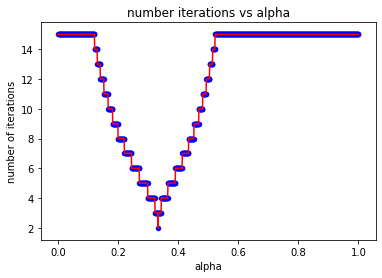

In [9]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
Df = lambda x: np.power(np.abs(x), -2./3) / 3
print(optimal_alpha(f, .01, Df))

0.333

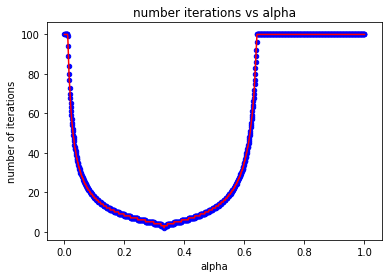

In [10]:
optimal_alpha(f,0.01,Df,maxiter=100)

In [11]:
g = lambda x: np.array([x[0]*x[1], x[1]*x[2], x[0]-x[1]])
Dg = lambda x: np.array([[x[1],x[0],0], [0,x[2],x[1]],[1,-1,0]])
x0 = np.array([0.5,0.5,0.5])

In [12]:
newton(g,x0,Dg,alpha=0.3,maxiter=200)

(array([2.9114246e-05, 2.9114246e-05, 2.9114246e-05]), True, 59)

In [13]:
newton2(g,x0,Dg,alpha=0.3,maxiter=200)

(array([3.42520541e-05, 3.42520541e-05, 3.42520541e-05]), True, 60)

0.972

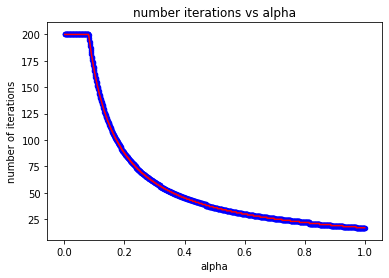

In [15]:
optimal_alpha(g,x0,Dg,maxiter=200)

In [16]:
# Problem 6
def prob6():
    """Consider the following Bioremediation system.

                              5xy − x(1 + y) = 0
                        −xy + (1 − y)(1 + y) = 0

    Find an initial point such that Newton’s method converges to either
    (0,1) or (0,−1) with alpha = 1, and to (3.75, .25) with alpha = 0.55.
    Return the intial point as a 1-D NumPy array with 2 entries.
    """
    #defining both functions in the system
    f = lambda X:  np.array([5*X[0]*X[1] - X[0]*(1 + X[1]), -X[0]*X[1] + (1-X[1])*(1+X[1])])
    Df = lambda X: np.array([[5*X[1]-(1+X[1]),5*X[0] - X[0]],
                             [ -X[1],-X[0] - 2*X[1]]  ])
    
    #defining grid
    X = np.linspace(-0.25,0,50)
    Y = np.linspace(0,0.25,50)
    
    P = []
    #for each possible combination of x and y coords
    for x in X:
        for y in Y:
            #make into array
            pnt = np.array([x,y])
            
            #if newton method converges for alpha 1...
            new_pnt = newton(f,pnt,Df,alpha=1)[0]
            if np.allclose(new_pnt,np.array([0,1])) or np.allclose(new_pnt,np.array([0,-1])):
                
                #check if converges for alpha 0.55
                new_new_pnt = newton(f,pnt,Df,alpha=0.55)[0]
                if np.allclose(new_new_pnt,np.array([3.75,0.25])):
                    return pnt

In [17]:
prob6()

array([-0.23979592,  0.21428571])

In [18]:
# Problem 7
def plot_basins(f, Df, zeros, domain, res=1000, iters=15):
    """Plot the basins of attraction of f on the complex plane.

    Parameters:
        f (function): A function from C to C.
        Df (function): The derivative of f, a function from C to C.
        zeros (ndarray): A 1-D array of the zeros of f.
        domain ([r_min, r_max, i_min, i_max]): A list of scalars that define
            the window limits and grid domain for the plot.
        res (int): A scalar that determines the resolution of the plot.
            The visualized grid has shape (res, res).
        iters (int): The exact number of times to iterate Newton's method.
    """
    #creating grid
    x_real = np.linspace(domain[0],domain[1],res)
    x_imag = np.linspace(domain[2],domain[3],res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    
    #running newton's method on X_0
    for k in range(iters):
        X_k = X_0 - f(X_0)/Df(X_0)
        X_0 = X_k
    
    #populating Y with the nearest zero's index
    Y = np.empty((res,res))
    for i in range(res):
        for j in range(res):
            Y[i,j] = np.argmin(abs(X_k[i,j] - zeros))
            
    plt.pcolormesh(x_real,x_imag,Y,cmap='brg')
    plt.show()

In [19]:
f = lambda x: x**3 - 1
df = lambda x: 3*x**2
zeros = [1,-0.5 + np.sqrt(3)/2 *1j,-0.5 - np.sqrt(3)/2 *1j]

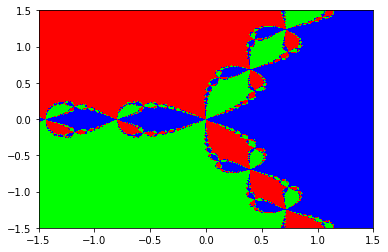

In [20]:
plot_basins(f,df,zeros,domain=[-3/2,3/2,-3/2,3/2])